## Data Visualization

* Interactive version: http://whichgraph.com/

![which-graph.jpeg](./images/which-graph.jpeg)

* DataViz is [Arts](https://public.tableau.com/en-us/gallery/?tab=viz-of-the-day&type=viz-of-the-day), but for our purpose, we can keep it simple for our EDA purpose
* Check out [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html), where you can find many Python template for different types of charts 

In [5]:
## Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style="ticks")

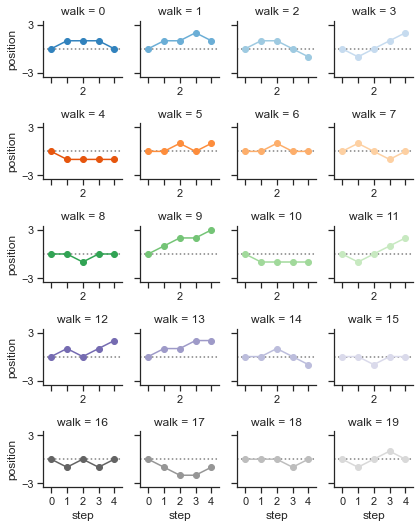

In [1]:
# Souce: https://seaborn.pydata.org/examples/many_facets.html

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

We have worked with Seaborn since the last part in EDA, let's walk through some common plot 

In [30]:
## Load data
data = pd.read_csv('./data/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Line Plot

<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Age', ylabel='Fare'>

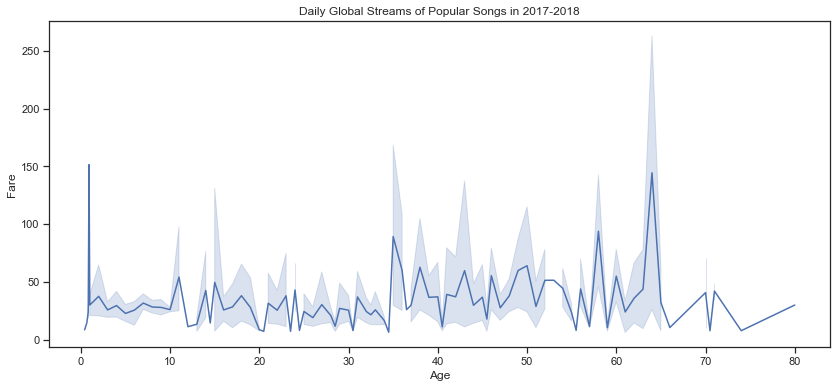

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))
# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# The plot
sns.lineplot(data.Age, data.Fare)

<AxesSubplot:title={'center':'Daily Global Streams of Popular Songs in 2017-2018'}, ylabel='Age'>

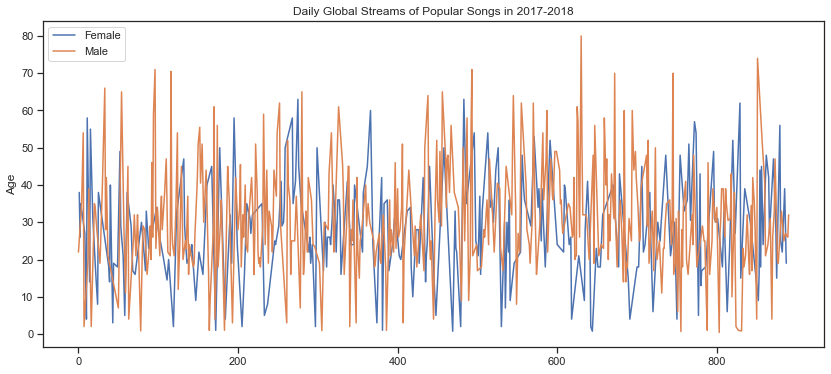

In [13]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))
# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")
# The plot (with 2 lines)
sns.lineplot(data=data[data.Sex == 'female']['Age'], label='Female')
sns.lineplot(data=data[data.Sex != 'female']['Age'], label='Male')

## Scatter Plots 

<AxesSubplot:title={'center':'Scatter Plot: Age x Fare'}, xlabel='Fare', ylabel='Age'>

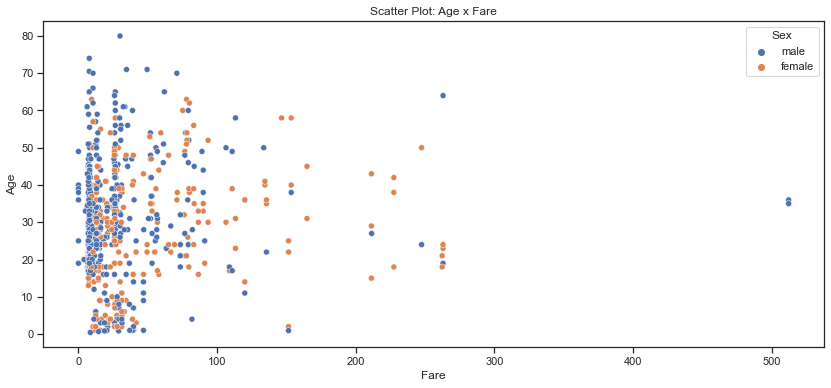

In [20]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))
# Add title
plt.title("Scatter Plot: Age x Fare")
sns.scatterplot(x=data.Fare, y=data.Age, hue=data.Sex) ## Add Color

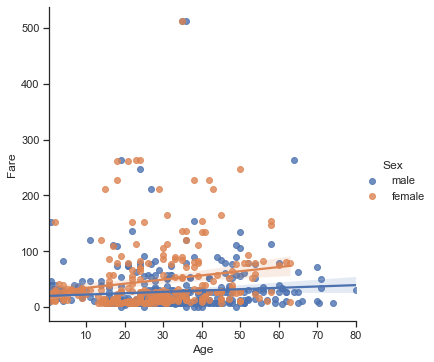

In [23]:
# We can add the regression lines to scatter plot
sns.lmplot(x='Age', y='Fare', hue='Sex', data=data) ## Add Color

## Bar Chart

Text(0, 0.5, 'Fare')

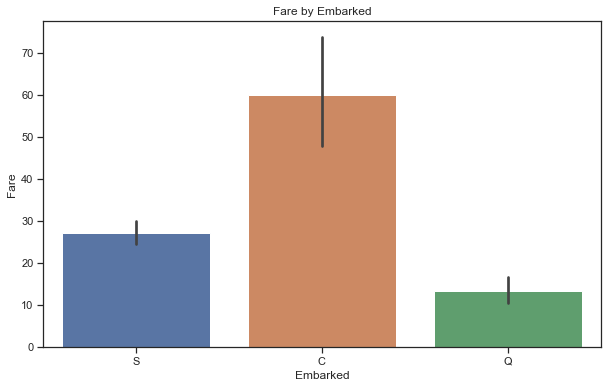

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Fare by Embarked")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data.Embarked, y=data.Fare)

# Add label for vertical axis
plt.ylabel("Fare")

## Distribution

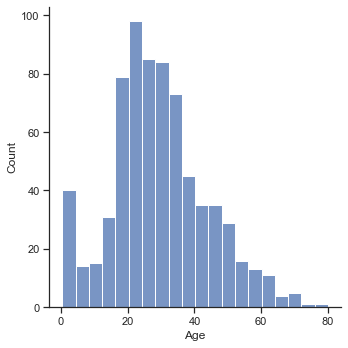

In [25]:
sns.displot(data['Age']) ## Histogram

<AxesSubplot:xlabel='Age', ylabel='Density'>

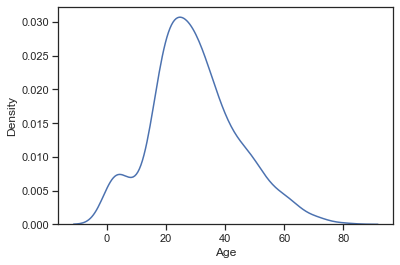

In [26]:
sns.kdeplot(data['Age']) ## Density: kde = kernel density estimate

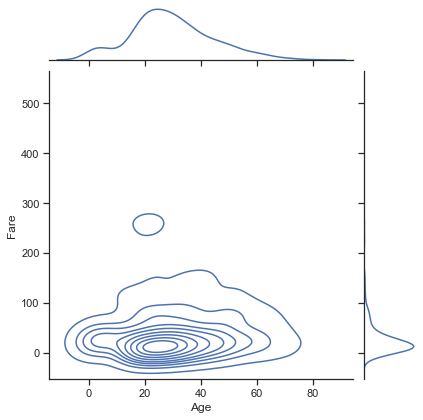

In [27]:
# 2D KDE plot
sns.jointplot(data.Age, data.Fare, kind="kde")

In [ ]:
# TODO: Do exercise 1, 2, 3, 4, 5 at https://www.kaggle.com/learn/data-visualization